In [777]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

In [762]:
data=pd.read_csv(r"D:\all download\employee_churn_data.csv")
# reading a csv file 

In [763]:
data.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [764]:
data.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [765]:
data.isnull().sum() 
# checking if there is a null values  

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

## Q1 Which department has the highest employee turnover? Which one has the lowest?

In [766]:
data.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [767]:
department_left=data[["department","left"]]
# we have created a DataFrame in which there are 2 feature (department and left)

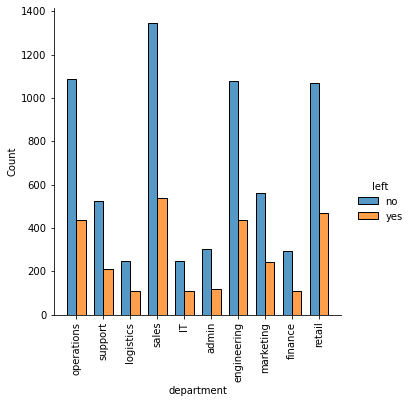

In [768]:
sns.displot(data=department_left,x="department",hue="left",multiple="dodge",shrink=.7,)
plt.xticks(rotation=90)
plt.show()

#### by the above plt we cannot come a conclution that sales have highest turnover because the department values are not uniform for this we have to take a percentage of each department with respect to left feature  

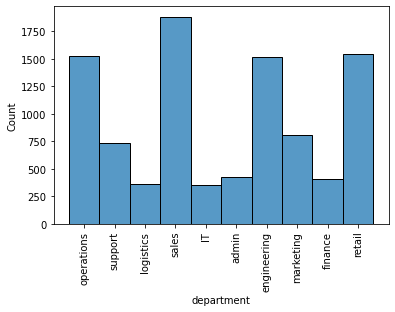

In [769]:
sns.set_style
sns.histplot(data["department"])
plt.xticks(rotation=90)
plt.show()
# in this plot we want to count the values of each department 

In [770]:
turnover_department={}
# created a dictonary so we can store the department turnover percentage in respect to the left 

In [771]:
for d in data["department"].unique():
    turnover_department[d]=data[(data["department"]==d)&(data["left"]=="yes")].count()[0]/(data[(data["department"]==d)].count()[0])*100
#     print(data[(data["department"]==d)&(data["left"]=="yes")].count()[0])

#### by this we will get the percentage of how many employee leave over a specfic department 

In [772]:
hightest_turnover=max(turnover_department,key=turnover_department.get),max(turnover_department.values())
lowest_turnover=min(turnover_department,key=turnover_department.get),min(turnover_department.values())

In [773]:
turnover_department

{'operations': 28.64651773981603,
 'support': 28.843537414965986,
 'logistics': 30.833333333333336,
 'sales': 28.51832182687201,
 'IT': 30.89887640449438,
 'admin': 28.132387706855795,
 'engineering': 28.825857519788915,
 'marketing': 30.29925187032419,
 'finance': 26.865671641791046,
 'retail': 30.564568462037638}

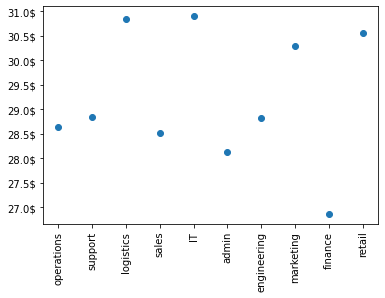

('IT', 30.89887640449438) maximum turn over
('finance', 26.865671641791046) minimum turn over


In [808]:
# fig, ax1 = plt.subplots()
plt.scatter(turnover_department.keys(),turnover_department.values())
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{}$'.format))
plt.show()
print(f"{hightest_turnover} maximum turn over")
print(f"{lowest_turnover} minimum turn over")

## this plot shows the percentage 

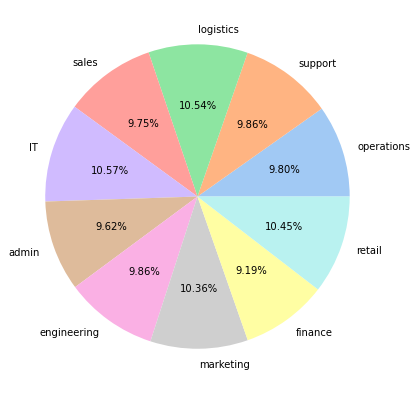

In [125]:
colors = sns.color_palette('pastel')[0:10]
plt.figure(figsize=(10,7))
plt.pie(turnover_department.values(),labels=turnover_department.keys(),colors=colors,autopct='%0.2f%%')
plt.show()

as we can see that IT department have the most turnover rate while finance have the lowest

### Q2 Investigate which variables seem to be better predictors of employee departure.

In [805]:
data=data.replace({"yes":1,"no":0})

In [806]:
data.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,0
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,0
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,0
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,0
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,0


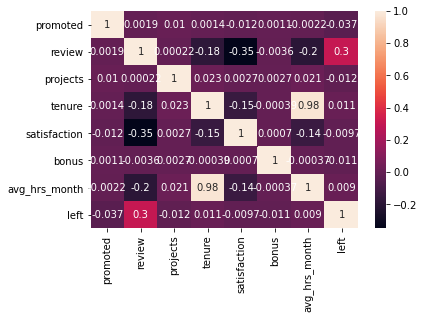

In [807]:
sns.heatmap(data.corr(),annot=True)
plt.show()

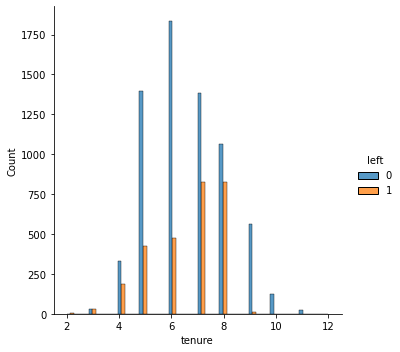

In [708]:
sns.displot(data=data,x="tenure",hue="left",multiple="dodge")
plt.show()

##### as we can see that 6 and 7 tenure people have more turnover than other,so we will explore these tenure 

In [28]:
data["tenure"].value_counts()
# values count per tenure 

6.0     2313
7.0     2209
8.0     1888
5.0     1823
9.0      578
4.0      518
10.0     127
3.0       57
11.0      23
2.0        3
12.0       1
Name: tenure, dtype: int64

In [29]:
tenure_greater_than_6=data[data["tenure"]>6] # tenure with above 6 year
tenure_less_than_6=data[data["tenure"]<=6] # tenure with below 6 year

In [34]:
data["promoted"].value_counts()

0    9251
1     289
Name: promoted, dtype: int64

In [37]:
range_of_tenure=list(range(2,13))
tenure_percentage=dict()

In [38]:
for i in range_of_tenure:
    tenure_percentage[i]=(data[(data["tenure"]==i)&(data["left"]==1)].count()[0]/data[data["tenure"]==i].count()[0]*100)

In [39]:
tenure_percentage

{2: 66.66666666666666,
 3: 52.63157894736842,
 4: 35.907335907335906,
 5: 23.477783872737245,
 6: 20.665801988759185,
 7: 37.25667722951562,
 8: 43.59110169491525,
 9: 2.422145328719723,
 10: 0.0,
 11: 0.0,
 12: 0.0}

In [243]:
data_with_8_and_7=data[(data["tenure"]>=7)&(data["tenure"]<=8)]

In [44]:
tenure_less_than_6["avg_hrs_month"]=tenure_less_than_6["avg_hrs_month"].astype(float)
tenure_greater_than_6["avg_hrs_month"]=tenure_greater_than_6["avg_hrs_month"].astype(float)

In [46]:
data.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,0
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,0
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,0
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,0
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,0


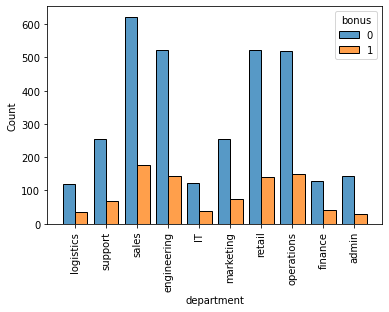

In [100]:
sns.histplot(data=data_with_8_and_7,x="department",hue="bonus",multiple="dodge",shrink=0.8)
plt.xticks(rotation=90)
plt.show()

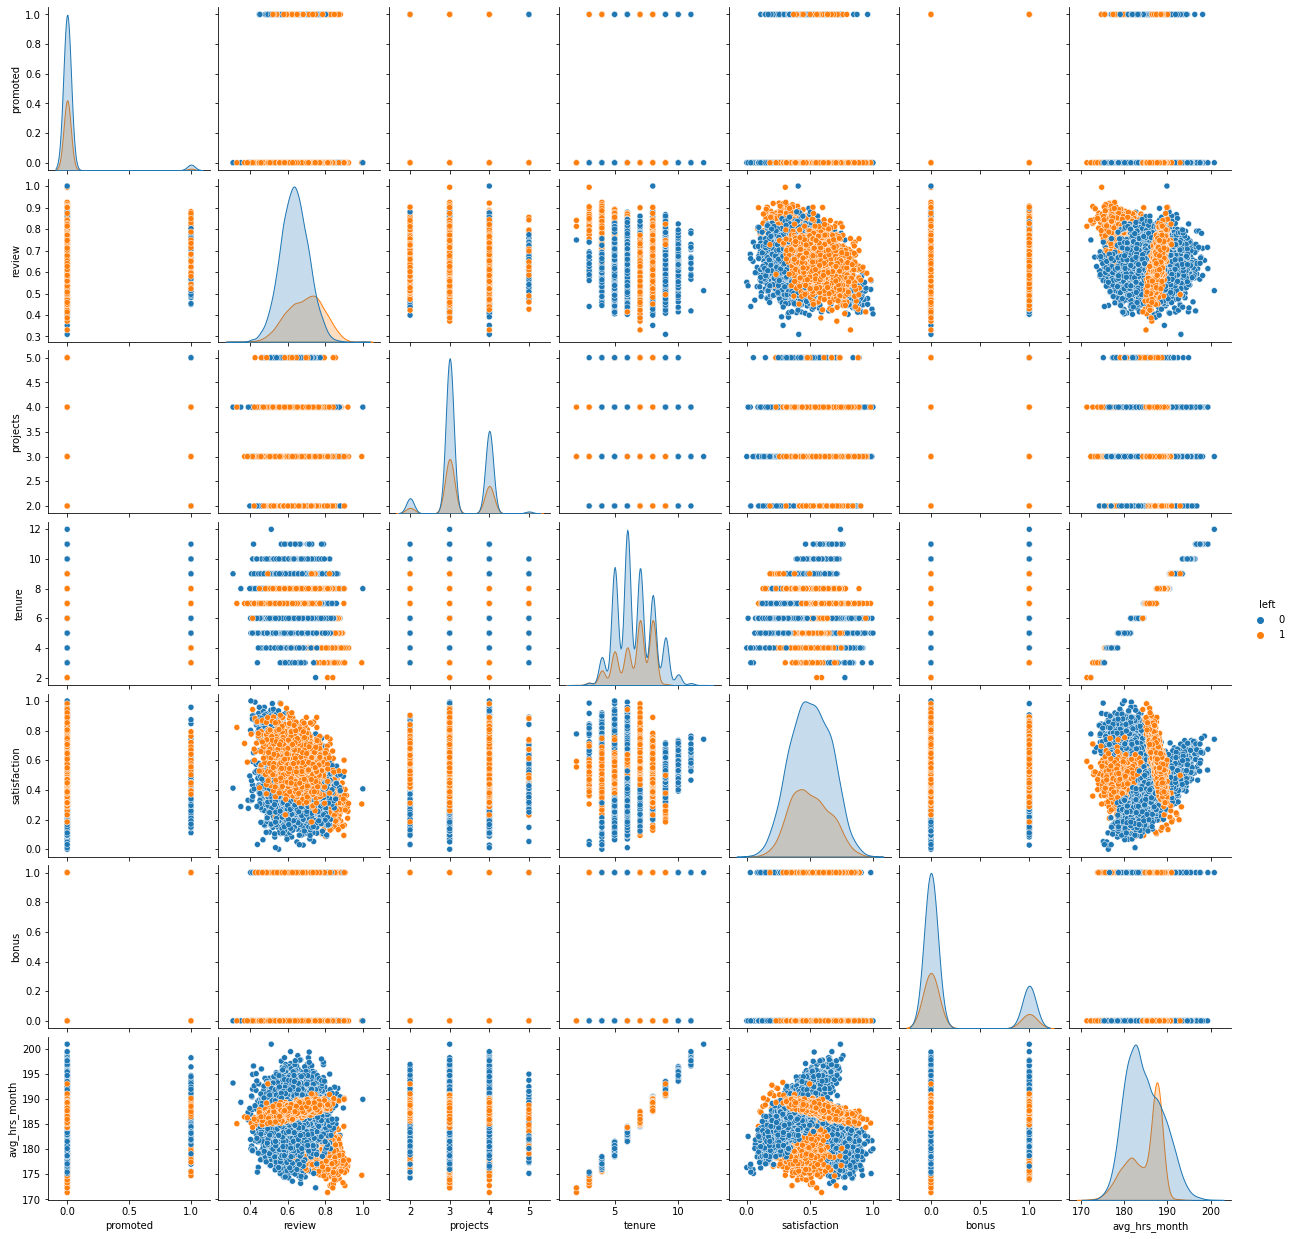

In [547]:
sns.pairplot(data,hue="left")

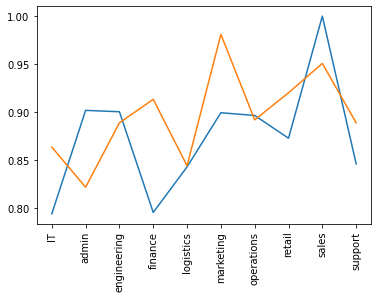

In [245]:
plt.plot(data_with_8_and_7.groupby("department")[["review","satisfaction"]].max())
plt.xticks(rotation=90)
plt.show()

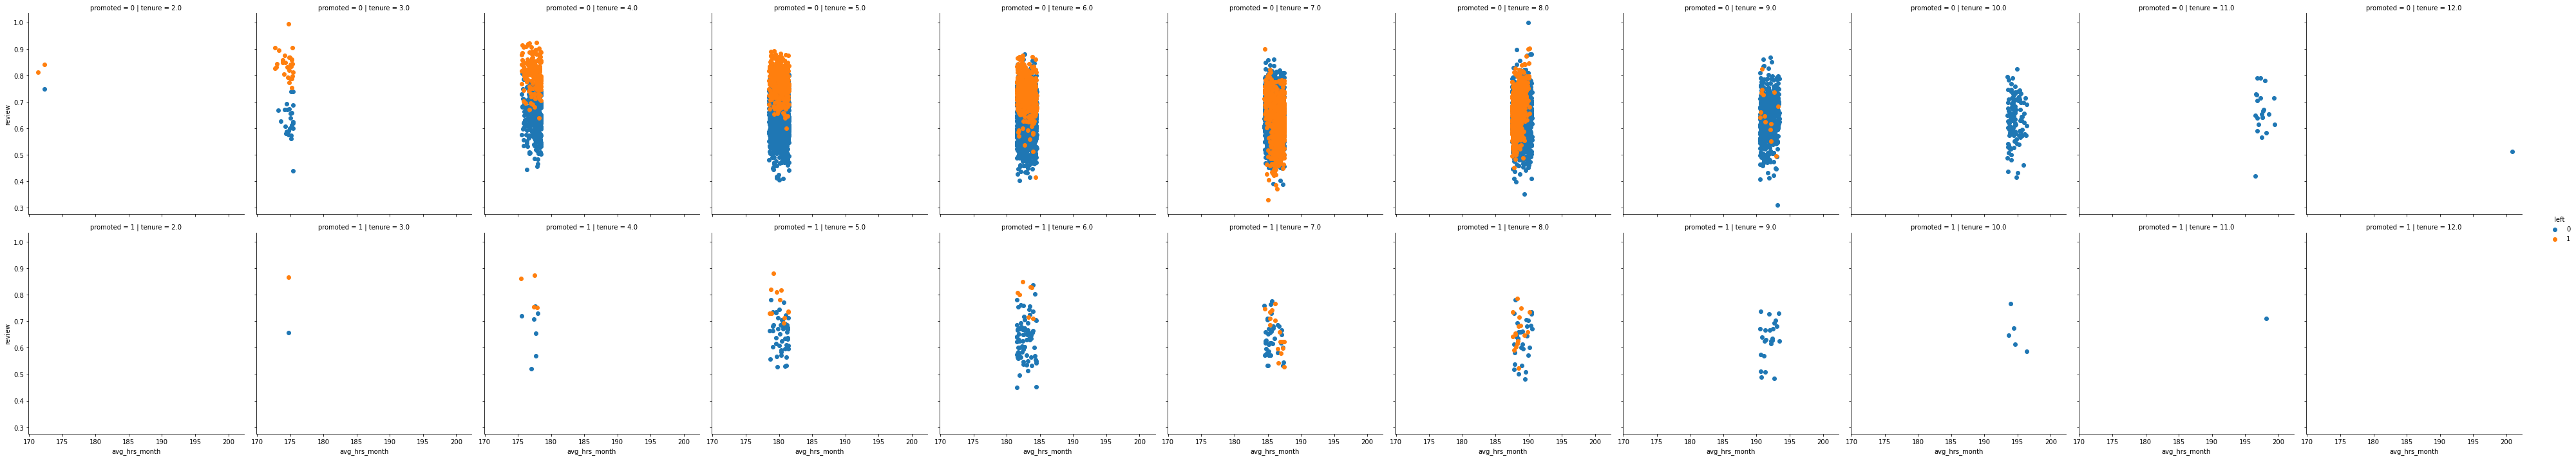

In [340]:
sns.FacetGrid(data,col="tenure",row="promoted", hue="left", height=5,) \
   .map(plt.scatter, "avg_hrs_month", "satisfaction",cmap=plt.get_cmap("jet")) \
   .add_legend()

## i think if a person have higher review that there is chances of leaving a company but we are seeing that tenure 7 and 8 have different parameter for leaving 

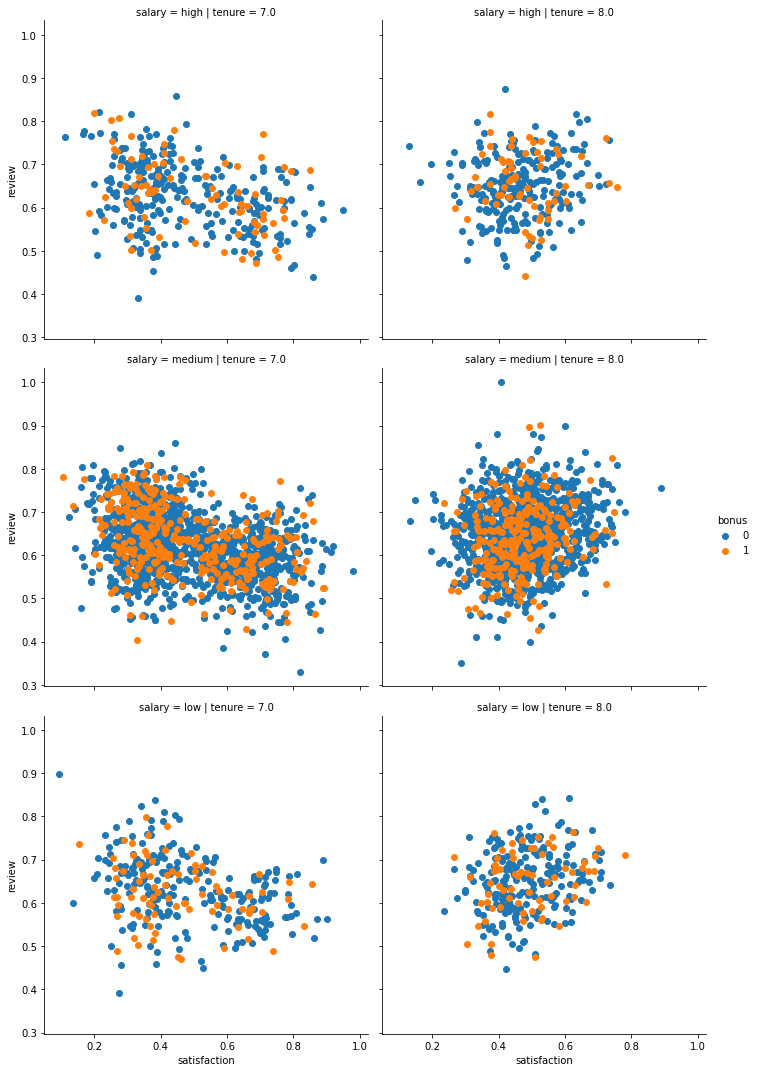

In [353]:
sns.FacetGrid(data_with_8_and_7,col="tenure",row="salary" ,hue="bonus", height=5,) \
   .map(plt.scatter, "satisfaction", "review",cmap=plt.get_cmap("jet")) \
   .add_legend()

###  so as we see there is no as such issue with their salary 

In [356]:
mean_of_avg_per_tenure=data.groupby("tenure")["avg_hrs_month"].mean()

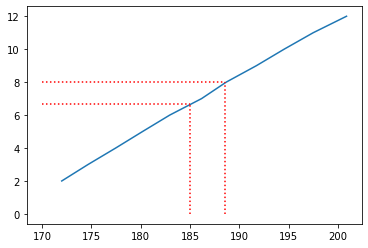

In [529]:
plt.plot(mean_of_avg_per_tenure,list(range(2,13)))
plt.plot([185,185],[0,6.7],"r:")
plt.plot([170,185],[6.7,6.7],"r:")
plt.plot([170,188.5],[8,8],"r:")
plt.plot([188.5,188.5],[0,8],"r:")

#### relation between tenure and avg_hour_month and in that we are finding about only for 7 and 8 tenure people and the difference is 185-188

now we will find how much data lies between 185-188 in which employee left the company 

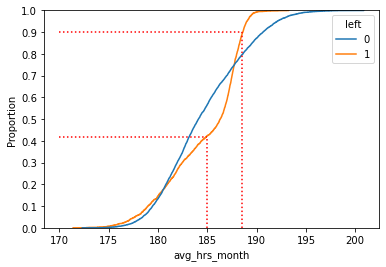

In [543]:
sns.ecdfplot(x="avg_hrs_month",data=data,hue="left")
plt.plot([185,185],[0,0.42],"r:")
plt.plot([170,185],[0.42,0.42],"r:")
plt.plot([170,188.5],[0.9,0.9],"r:")
plt.plot([188.5,188.5],[0,0.9],"r:")
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

#### the above figure shows that between 185 to 188.5 , almost 50% of employee left the company
now we will see that why they left it 

 #### checking if they are getting promoted for doing the extra hours of work 

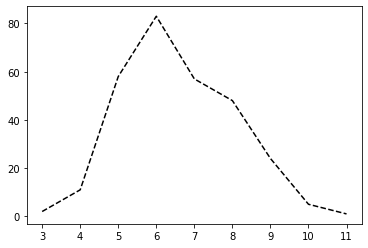

In [660]:
data_tenure_promoted=data[data["promoted"]==1]["tenure"].value_counts()
plt.plot(data_tenure_promoted.sort_index().index,data_tenure_promoted.sort_index().values,"k--")
plt.show()

##### the above figure shows that tenure vs promotion, as the people have more expierence have much more promotion change but after 6 year of experiance the promotion rate is much more lower 

In [707]:
satisfaction_level_before_6=tenure_less_than_6["satisfaction"].round().mean()
satisfactiom_level_after_6=tenure_greater_than_6["satisfaction"].round().mean()
print(f"{satisfaction_level_before_6:.2f} the satisfaction before  6 year")
print(f"{satisfactiom_level_after_6:.2f} the satisfaction after   6 year")

0.58 the satisfaction before  6 year
0.42 the satisfaction after   6 year


## CONCLUSION
### For the people who are leaving the company have much more avg_hour_month with less promotion opportunity and their satisfaction is below then everyone and have higher reviews 

 ## Q3: What recommendations would you make regarding ways to reduce employee turnover?

# ANS
### In my opinion by seeing the stats and figure and i came to conclution that most of the people leaving the company after 6 year and their primary reasons are less promotion then another and having greater hours work also with lower satisfaction for this to reduce the turnover they have to offer more opportunities for growth by raising their current employees up the ladder (Give regular raises and promotions) instead of turnover them